In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic-Dataset.csv


# LOADING THE DATASET

In [4]:
df=pd.read_csv('/kaggle/input/titanic/Titanic-Dataset.csv')

# UNDERSTANDING THE DATA

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape   ## THE DIMENSIONS OF THE DATASET
print('The number of rows in the dataset are:',df.shape[0])
print('The number of columns in the dataset are:',df.shape[1])


The number of rows in the dataset are: 891
The number of columns in the dataset are: 12


In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.50,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.05,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.90,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.00,NaN,S


In [8]:
df.info()  ## OVERVIEW OF THE DATASET


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# CHECKING FOR NULL VALUES

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop(columns=['Cabin'],inplace=True)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
mean_age=round(df['Age'].mean(),2)
print(mean_age)

29.7


In [15]:
df['Age']=df['Age'].fillna(mean_age)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# UNIVARIATE ANALYSIS

Understanding and Visualizing all columns data one by one.

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
## ANALYZING THE SURVIVED COLUMN
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

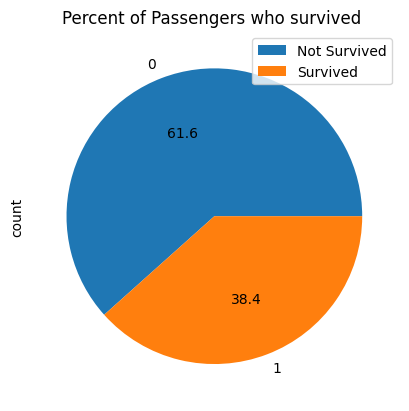

In [20]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Percent of Passengers who survived ')
plt.legend(labels=['Not Survived','Survived'],loc='upper right')
plt.show()

**61% of the total passengers did not survive**
**Only 39% of the total passengers managed to survive**

In [21]:
## Analyzing the Pclass column
df['Pclass'].unique()

array([3, 1, 2])

In [22]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

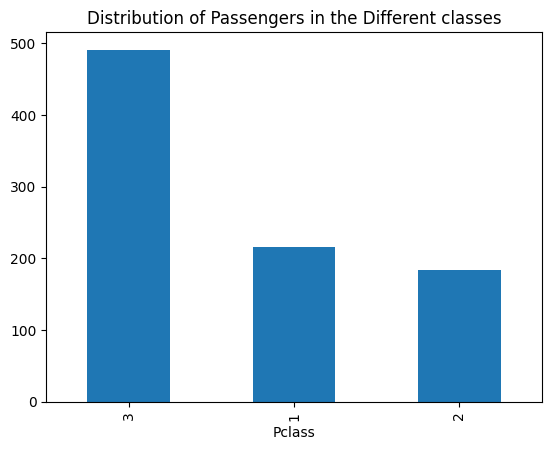

In [23]:
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Distribution of Passengers in the Different classes')
plt.show()

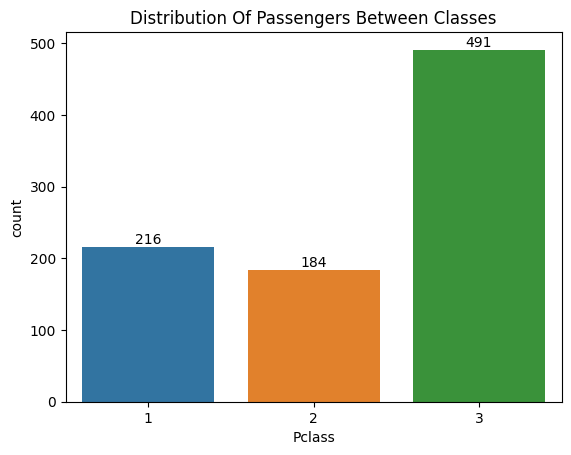

In [24]:
ax=sns.countplot(data=df,x='Pclass')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution Of Passengers Between Classes')
plt.show()

In [25]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [26]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

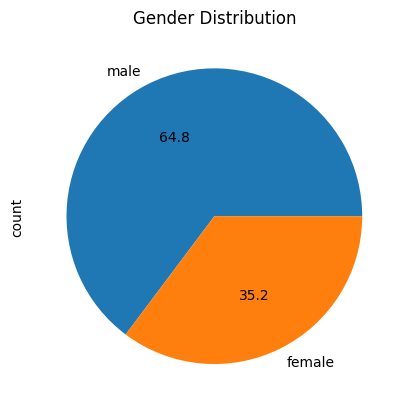

In [27]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Gender Distribution')
plt.show()


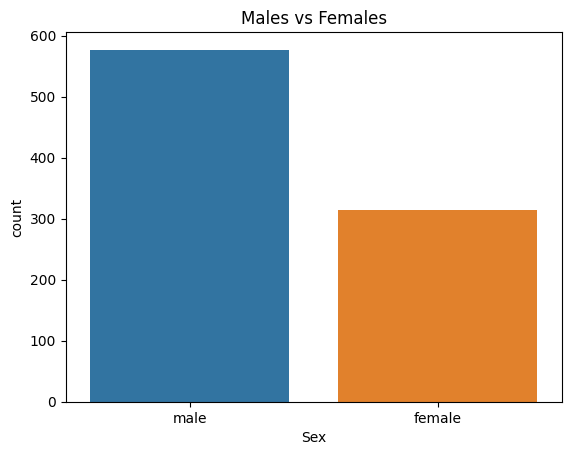

In [28]:
sns.countplot(data=df,x='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Males vs Females')
plt.show()

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
df['Age'].dtype

dtype('float64')

In [31]:
df['Age'].describe()

count    891.000000
mean      29.699293
std       13.002015
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

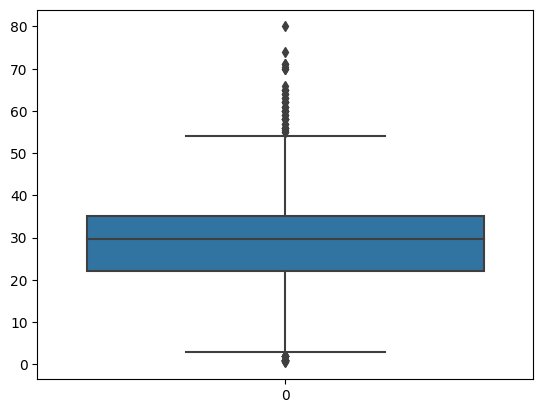

In [32]:
sns.boxplot(df['Age'])

/tmp/ipykernel_36/43512197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

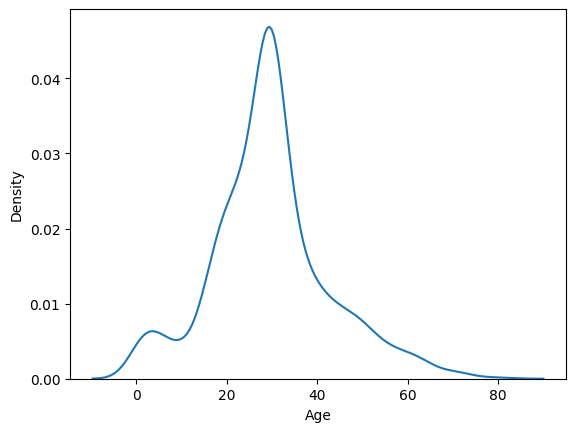

In [33]:
sns.distplot(df['Age'],hist=False)

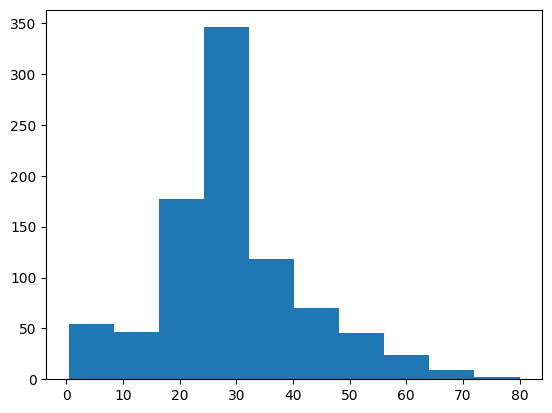

In [34]:
plt.hist(df['Age'],bins=10)
plt.show()

In [35]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

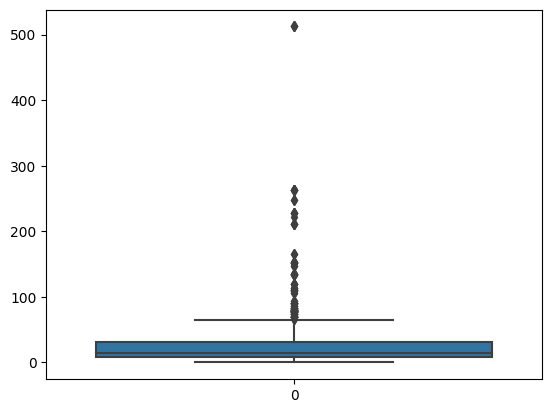

In [36]:
sns.boxplot(df['Fare'])

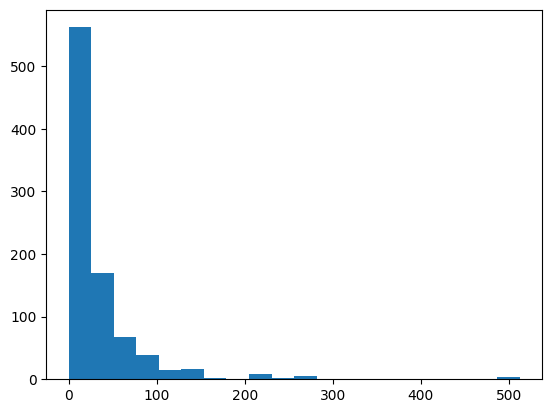

In [37]:
plt.hist(df['Fare'],bins=20)
plt.show()

/tmp/ipykernel_36/992341824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],hist=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

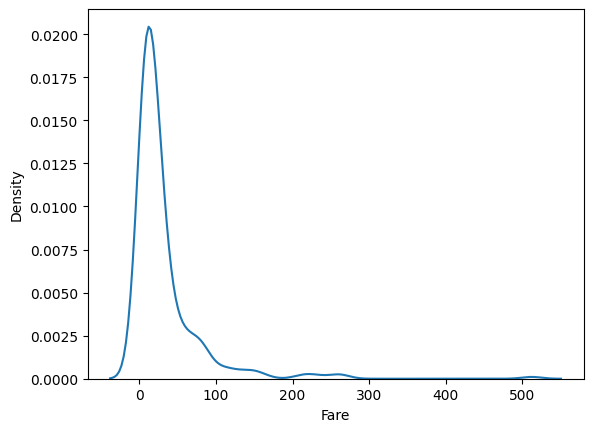

In [38]:
sns.distplot(df['Fare'],hist=False)

# BIVARIATE AND MULTIVARIATE ANALYSIS

**1) BARPLOT(NUMERICAL-CATEGORICAL)**

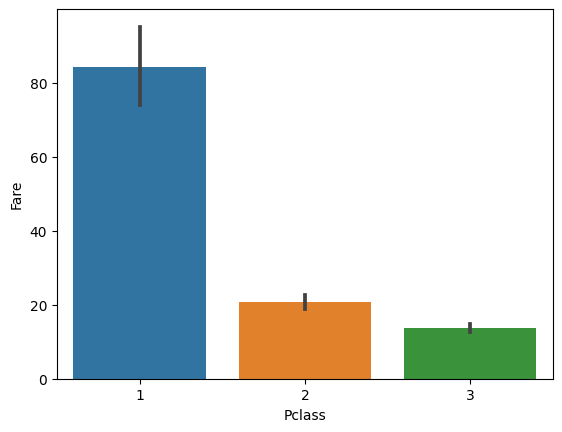

In [39]:
sns.barplot(x='Pclass',y='Fare',data=df)
plt.show()

PClass1 tickets were most expensive and Pclass3 tickets were the cheapest.

In [40]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

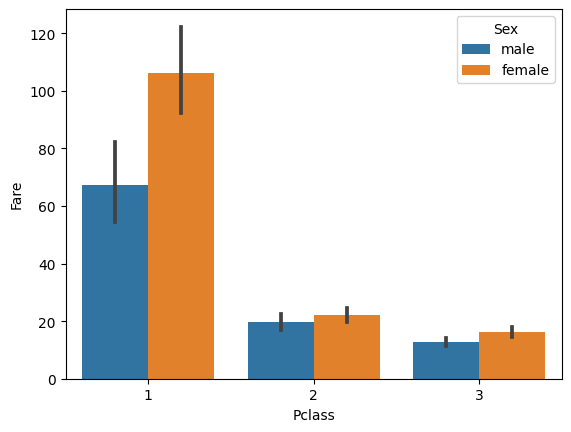

In [41]:
ax=sns.barplot(x='Pclass',y='Fare',hue='Sex',data=df)
plt.show()

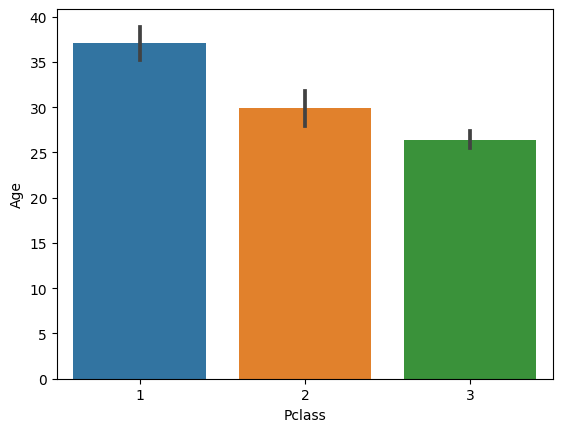

In [42]:
sns.barplot(x='Pclass',y='Age',data=df)
plt.show()

In [43]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048241
2    29.867011
3    26.403503
Name: Age, dtype: float64

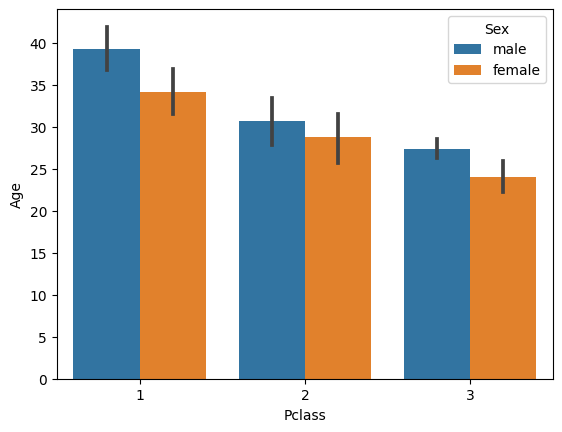

In [44]:
sns.barplot(x='Pclass',y='Age',hue='Sex',data=df)
plt.show()

**2.BOXPLOT(NUMERICAL-CATEGORICAL)**

<Axes: xlabel='Sex', ylabel='Age'>

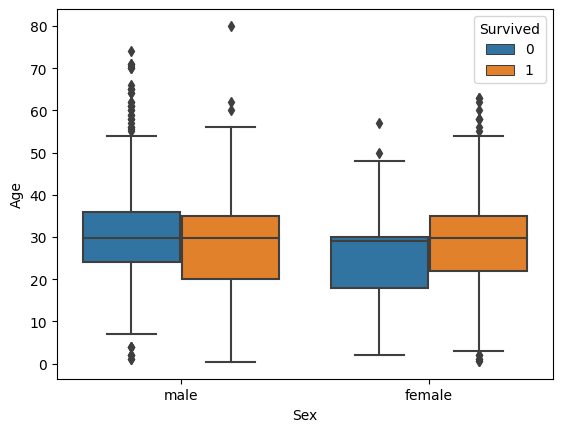

In [45]:
sns.boxplot(data=df,x='Sex',y='Age',hue='Survived')
plt.show()

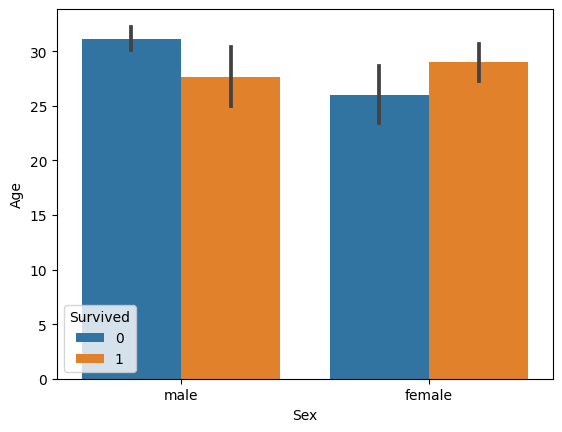

In [54]:
sns.barplot(data=df,x='Sex',y='Age',hue='Survived')
plt.show()

**VIOLIN PLOT**

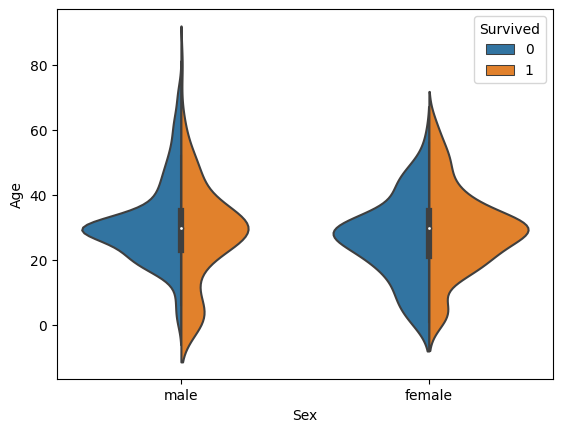

In [55]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True)
plt.show()

The survival rate is -  

1. Good for children.
2. High for women in the age range 20-50.
3. Less for men as the age increases.

**3.DISTPLOT(NUMERICAL-CATEGORICAL)**

/tmp/ipykernel_36/829076285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'],hist=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/829076285.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level fun

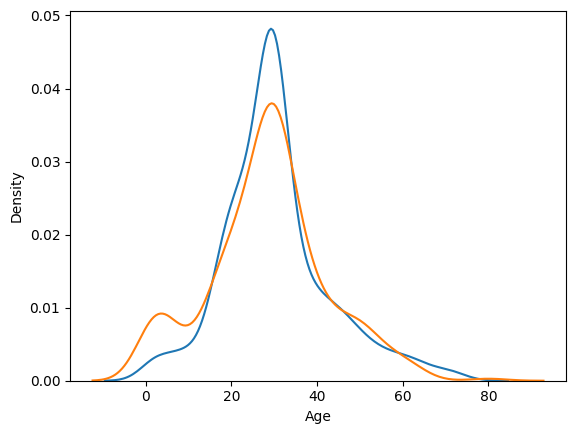

In [46]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)
plt.show()

**4.HEATMAP(CATEGORICAL-CATEGORICAL)**

In [47]:
x=pd.crosstab(df['Pclass'],df['Survived'])
x

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


**The passengers travelling in Pclass1 had the highest survival ratio**


<Axes: xlabel='Survived', ylabel='Pclass'>

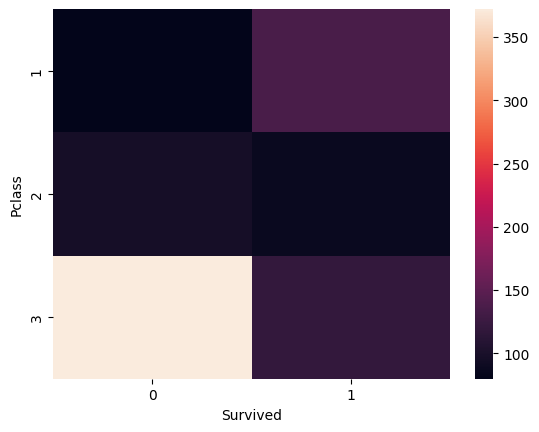

In [48]:
sns.heatmap(x)

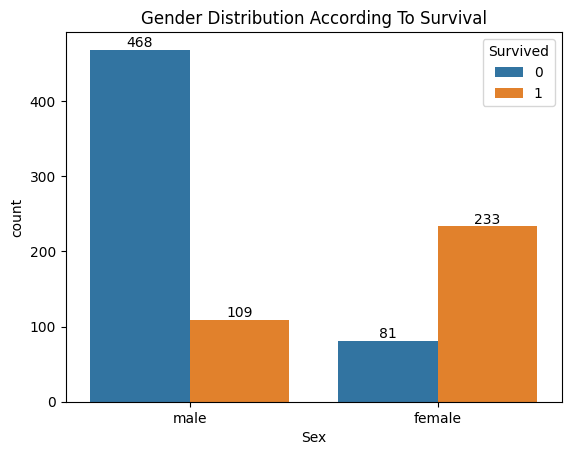

In [49]:
ax=sns.countplot(x='Sex',data=df,hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution According To Survival')
plt.show()
    

**More no of females were able to survive as compared to men**

In [50]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


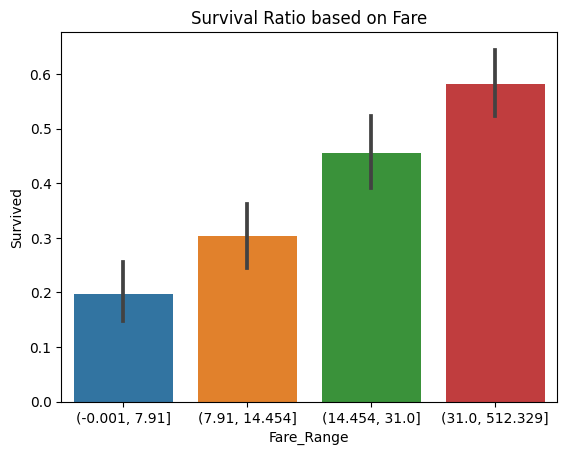

In [60]:
## FARE AND SURVIVAL CHANCES
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
ax=sns.barplot(data=df,x='Fare_Range',y='Survived')
plt.title('Survival Ratio based on Fare')
plt.show()

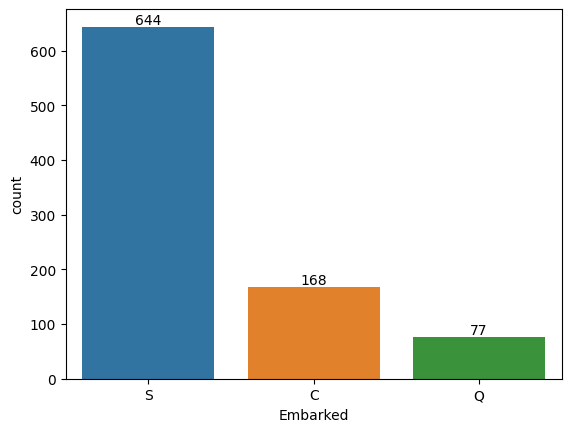

In [51]:
#df['Embarked'].value_counts().plot(kind='bar')
ax=sns.countplot(data=df,x='Embarked')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
    

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


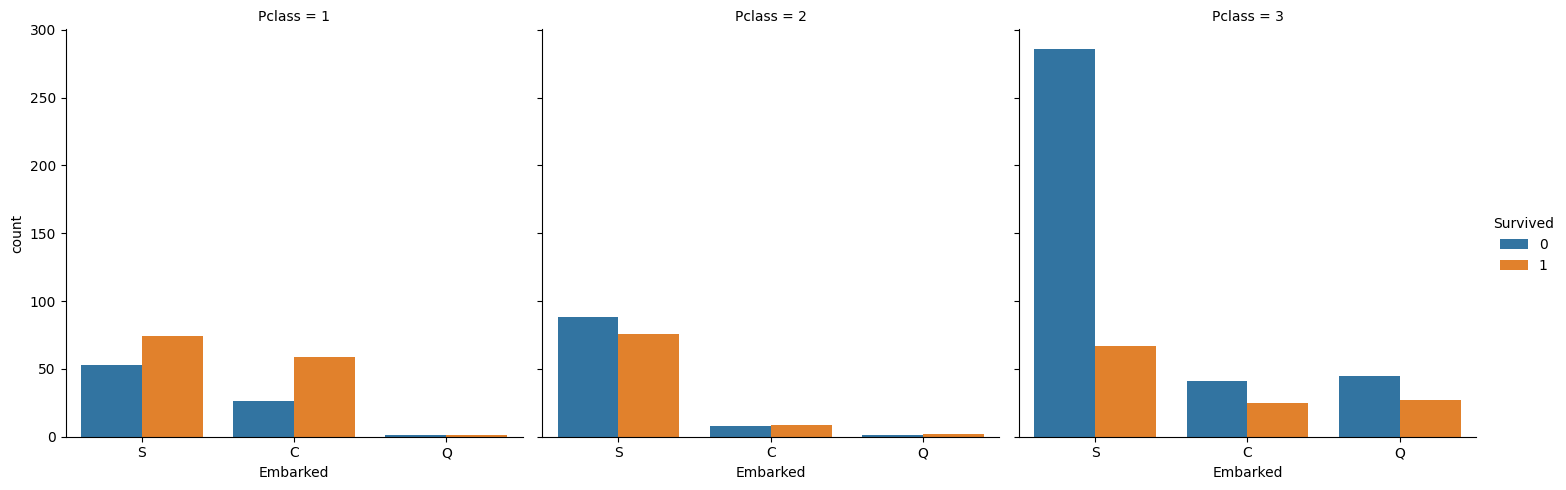

In [58]:
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = df)
plt.show()

**CONCLUSION**
1. The survival rate was maximum in passengers travelling in Pclass 1 and minimum in passengers travelling in Pclass 3
2. The fare was maximum for Pclass 1 and minimum for Pclass 3. 
3. The age distribution of passengers shows that younger passengers had greater chances of survival as compared to the older passengers.
4. Most no of passengers were travelling through Pclass 3 as it was the cheapest and most affordable.
5. More no of female passengers were able to survive as compared to male passengers.
6. The survival rate of men is around 20% and that of women is around 75%.
7. It can be inferred that the passengers who paid higher fares showed greater chances of survival.
   